# SciPy

## Introduction

The `scipy` package contains several _sub-packages_ defining modules that provide efficient, **ready-to-use** implementations of numerous computational tools and algorithms that can be invoked independently or to incorporated into more complicated **customized** scientific analyses.

The SciPy project provides [extensive online reference documentation](http://docs.scipy.org/doc/scipy/reference/index.html#reference) as well as a helpful [tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/index.html) that provides a pedagogical introduction to many of `scipy`'s most useful modules.

The modules provided by `scipy` integrate transparently with the `numpy` and `matplotlib` packages, and leverage the powerful **numerical analysis** and **plotting** functionality they provide.

To take advantage of this package integration, the `numpy` and `matplotlib` packages must be independently `import`ed. 

In [353]:
import numpy
import matplotlib
from matplotlib import pyplot
# enable inline display of plotted figures in the IPython Notebook interface
%matplotlib inline 

The `scipy` package must also be `import`ed.

In [354]:
import scipy

To see the list of sub-packages that `scipy` provides, use the `help(...)` function.

In [355]:
help(scipy)

Help on package scipy:

NAME
    scipy

FILE
    /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/__init__.py

DESCRIPTION
    SciPy: A scientific computing package for Python
    
    Documentation is available in the docstrings and
    online at http://docs.scipy.org.
    
    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import.  For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fftpack                      --- Discrete Fourier Transform algorithms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     lib                          --- Python wrappers to external libraries
   

## Examples

The sub-packages of `scipy` provide extensive and diverse functionality. In subsequent sections, use of `scipy` will be demonstrated using a very restricted but (hopefully) illustrative subset of the package contents.

### Physical and Mathematical Constants and Units

Scientific computation often involves evaluation of formulae that are defined in terms of mathematical constants like $\pi$ and empirically determined physical values that are also **nominally** constant. The [`scipy.constants`](http://docs.scipy.org/doc/scipy/reference/constants.html) package defines a useful repository that provides **high precision** numeric values for many physical and mathematical constants to be used for scientific computation. 

Finally, the package also provides an interface to the table of [CODATA Recommended Values of the Fundamental Physical Constants 2010](http://physics.nist.gov/cuu/Constants/index.html) defined by the _National Institute of Science and Technology_ (NIST). This interface to the CODATA table also also defines the **units** and **relative measurement uncertainties** for each of the provided constants.

Finally, the `scipy.constants` package defines several functions that perform **unit conversion operations**.

#### Step 1: Import `scipy.constants`

In [ ]:
from scipy import constants

A list of the numeric values that are provided by the `scipy.constants` package is available [online](https://docs.scipy.org/doc/scipy-0.15.1/reference/constants.html) or **inline** using the `help(...)` function.

In [445]:
help (scipy.constants)

Help on package scipy.constants in scipy:

NAME
    scipy.constants

FILE
    /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/constants/__init__.py

DESCRIPTION
    Constants (:mod:`scipy.constants`)
    
    .. currentmodule:: scipy.constants
    
    Physical and mathematical constants and units.
    
    
    Mathematical constants
    
    ============  =================================================================
    ``pi``        Pi
    ``golden``    Golden ratio
    ============  =================================================================
    
    
    Physical constants
    
    =============  =================================================================
    ``c``          speed of light in vacuum
    ``mu_0``       the magnetic constant :math:`\mu_0`
    ``epsilon_0``  the electric constant (vacuum permittivity), :math:`\epsilon_0`
    ``h``          the Planck constant :math:`h`
    ``hbar``       :math:`\hbar = h/(2

#### Step 2: Excercise the Standard Interface to `scipy.constants`

The *standard* (non-CODATA) interface that is defined by `scipy.constants` provides the values of physical and mathematical constants as variables that are defined as symbols within the package namespace. Accordingly, their values can be reference dusing the "`.`" operator. 

Consider a concrete example involving the mathematical constants $\pi$ and $\phi$.

In [444]:
print "The value of " + u"\u03c0" + " is", scipy.constants.pi
print "The value of " + u"\u03A6" + " is", scipy.constants.golden_ratio

The value of π is 3.14159265359
The value of Φ is 1.61803398875


**Physical** constants that are provided via the standard `scipy.constants` interface are defined in terms of **SI units**. Consider another concrete example involving the elementary charge $e$ and the electron mass $m_{e}$.

In [451]:
print "The value of the elementary charge is", scipy.constants.elementary_charge, "Coulombs"
print "The value of the electron mass is", scipy.constants.electron_mass, "kg"

The value of the elementary charge is 1.602176565e-19 Coulombs
The value of the electron mass is 9.10938291e-31 kg


The standard `scipy.constants` interface also provides the values of various non-SI units in terms of SI units. The subsequent example prints the kilogram values that correspond to one ounce, one pound and one stone.  

In [453]:
print "1 ounce =>", scipy.constants.ounce, "kg"
print "1 pound =>", scipy.constants.pound, "kg"
print "1 stone =>", scipy.constants.stone, "kg"

1 ounce => 0.028349523125 kg
1 pound => 0.45359237 kg
1 stone => 6.35029318 kg


#### Step 3: Excercise the CODATA interface to `scipy.constants`

The identifier `scipy.constants` package stores the CODATA table in a _Python_ `dict` with the identifier `physical_constants`. The `dict` that is referenced by `scipy.constants.physical_constants` maps `str`-type keys to three-element `tuple`-type values. The keys correpond to the **name** of the tabulated constant, while the values store the **associated numeric data**. The elements of each `tuple` define

1. The numeric value of the constant, stored as a `float` type.
2. The associated unit, stored as a `str`-type.
3. The associated measurement uncertainty, stored as a `float` type.

The subsequent example extracts the tabulated data for the the value of $c$, which corresponds to the `dict` key "`speed of light in vacuum`".

In [454]:
print scipy.constants.physical_constants['speed of light in vacuum']

(299792458.0, 'm s^-1', 0.0)


Individual data corresponding to a particular **`key`** can be extracted using functions that are defined by the `scipy.constants` package.

1. The `scipy.constants.value(`**`key`**`)` function extracts and returns the numeric **value** of the constant corresponding to the specified **`key`**.
2. The `scipy.constants.unit(`**`key`**`)` function extracts and returns the `str`-type **unit** of the constant corresponding to the specified **`key`**.
3. The `scipy.constants.precision(`**`key`**`)` function extracts and returns the numeric value of the **relative measurement uncertainty** associated with constant value corresponding to the specified **`key`**.

**Note:** If an invalid key is supplied to any of these functions, a `KeyError` exception is raised.

In [462]:
print "Value of the alpha particle mass is", scipy.constants.value("alpha particle mass")
print "Associated units of the alpha particle mass are", scipy.constants.unit("alpha particle mass")
print "Associated relative measurement uncertainty for alpha particle mass is",scipy.constants.precision("alpha particle mass")

 Value of the alpha particle mass is 6.64465675e-27
Associated units of the alpha particle mass are kg
Associated relative measurement uncertainty for alpha particle mass is 4.3644090419e-08


The `scipy.constants.find(...)` function searches the `scipy.constants.physical_constants` `dict` for a **`key`** that matches all or part of an optional `str`-type keyword argument with the identifier `sub`. If the `sub` argument is omitted or empty, then all keys in the `scipy.constants.physical_constants` `dict` are returned. A second optional keyword argument `disp` accepts a boolean value. If the supplied value is `False`, then the matching keys are returned as the elements of a _Python_ `list`. Otherwise, the matching keys are simple printed.

In [464]:
# Pick a constant to search for!
print scipy.constants.find(sub="", disp=False)

['Angstrom star', 'Avogadro constant', 'Bohr magneton', 'Bohr magneton in Hz/T', 'Bohr magneton in K/T', 'Bohr magneton in eV/T', 'Bohr magneton in inverse meters per tesla', 'Bohr radius', 'Boltzmann constant', 'Boltzmann constant in Hz/K', 'Boltzmann constant in eV/K', 'Boltzmann constant in inverse meters per kelvin', 'Compton wavelength', 'Compton wavelength over 2 pi', 'Cu x unit', 'Faraday constant', 'Faraday constant for conventional electric current', 'Fermi coupling constant', 'Hartree energy', 'Hartree energy in eV', 'Josephson constant', 'Loschmidt constant (273.15 K, 100 kPa)', 'Loschmidt constant (273.15 K, 101.325 kPa)', 'Mo x unit', 'Newtonian constant of gravitation', 'Newtonian constant of gravitation over h-bar c', 'Planck constant', 'Planck constant in eV s', 'Planck constant over 2 pi', 'Planck constant over 2 pi in eV s', 'Planck constant over 2 pi times c in MeV fm', 'Planck length', 'Planck mass', 'Planck mass energy equivalent in GeV', 'Planck temperature', 'Pla

#### Step 4: Excercising the Unit Conversion Functions Provided by `scipy.constants`

For some unit conversions that require more than simple multiplicative scaling (e.g. the conversion between _Celsius_ and _Fahrenheit_), the `scipy.constants` package provides **functions** that implement the conversion operation.

Six functions are provided to perform temperature unit conversions between degrees of _Celsius_, _Fahrenheit_, and _Kelvin_.

1. `scipy.constants.C2K(`**`tempInCelsius`**`)` - Converts its argument from _Celsius_ to _Kelvin_.
2. `scipy.constants.K2C(`**`tempInKelvin`**`)` - Converts its argument from _Kelvin_ to _Celsius_.
3. `scipy.constants.F2C(`**`tempInFahrenheit`**`)` - Converts its argument from _Fahrenheit_ to _Celsius_.
4. `scipy.constants.C2F(`**`tempInCelsius`**`)` - Converts its argument from _Celsius_ to _Fahrenheit_.
5. `scipy.constants.F2K(`**`tempInFahrenheit`**`)` - Converts its argument from _Fahrenheit_ to _Kelvin_.
6. `scipy.constants.K2F(`**`tempInKelvin`**`)` - Converts its argument from _Kelvin_ to _Fahrenheit_.

Two additional functions are provided to perform the reciprocal mapping between the _frequency_ ($\nu$) and _wavelength_ ($\lambda$) of electromagnetic radiation. 

1. `scipy.constants.lambda2nu(`**`wavelength`**`)` - Maps its argument from _wavelength_ to _frequency_ space.
2. `scipy.constants.nu2lambda(`**`frequency`**`)` - Maps its argument from _frequency_ to _wavelength_ space.

The mapping is defined in terms of and the speed of light in vacuum $c$ according to $\lambda=c/\nu$.

In [467]:
# Define a temperature in degrees Fahrenheit
coldInFahrenheit = 20.0
# Convert to the equivalent value in degrees Celcius
coldInCelsius = scipy.constants.F2C(coldInFahrenheit)
print coldInFahrenheit, "degrees Fahrenheit is equivalent to", coldInCelsius, "degrees Celsius"

# Define a wavelenth in nanometres.
wavelengthInNm = 700.0

'''
Map the wavelength value into frequency space.

Note that the scipy.constants package also defines scalings that correspond
to vaious unit prefixes e.g. nano, milli etc 
'''
# Convert to the equivalent value in degrees Celcius
frequencyInHz = scipy.constants.lambda2nu(wavelengthInNm*scipy.constants.nano)
print "A wavelength of",wavelengthInNm, "nm corresponds to a frequency of", frequencyInHz, "Hz"

20.0 degrees Fahrenheit is equivalent to -6.66666666667 degrees Celsius
A wavelength of 700.0 nm corresponds to a frequency of 4.2827494e+14 Hz


### Signal Processing - The Fast Fourier Transform

The **Fast Fourier Transform** (FFT) algorithm is a particulary efficient method for computing the [**Discrete Fourier Transform**](http://en.wikipedia.org/wiki/Discrete_Fourier_transform) (DFT) and is a cornerstone of numerous computational **signal processing** analyses. Given a discretely sampled sequence $x[n]$ of $N$ complex-valued data, the DFT $y[k]$ is a complex-valued sequence defined coording to 

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x[n] \, ,$$

The DFT is invertable. The inverse transformation is defined according to

$$x[n] = \frac{1}{N} \sum_{n=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y[k] \, .$$

The `scipy.fftpack` subpackage implements a flexible and intuitive interface that facilitates application of the FFT and its inverse for multidimesnional datasets. The following example demonstrates application of a simple one-dimensional FFT and its inverse.

#### Step 1: Import `scipy.fftpack` 

In [361]:
''' 
Begin by importing the fftpack subpackage, allowing its symbols to be referenced
with appropriate qualification.
'''
from scipy import fftpack

The functionality provided by `fftpack` is documented [online](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack) and can be accessed *inline* using the `help(...)` function.

In [362]:
help(scipy.fftpack)

Help on package scipy.fftpack in scipy:

NAME
    scipy.fftpack

FILE
    /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/fftpack/__init__.py

DESCRIPTION
    Discrete Fourier transforms (:mod:`scipy.fftpack`)
    
    Fast Fourier Transforms (FFTs)
    
    .. autosummary::
       :toctree: generated/
    
       fft - Fast (discrete) Fourier Transform (FFT)
       ifft - Inverse FFT
       fft2 - Two dimensional FFT
       ifft2 - Two dimensional inverse FFT
       fftn - n-dimensional FFT
       ifftn - n-dimensional inverse FFT
       rfft - FFT of strictly real-valued sequence
       irfft - Inverse of rfft
       dct - Discrete cosine transform
       idct - Inverse discrete cosine transform
       dst - Discrete sine transform
       idst - Inverse discrete sine transform
    
    Differential and pseudo-differential operators
    
    .. autosummary::
       :toctree: generated/
    
       diff - Differentiation and integration of 

The `scipy.fftpack.fft` function implements a simple one-dimensional FFT. Use the `help(...)` function again to determine what arguments it requires.

In [363]:
help(scipy.fftpack.fft)

Help on function fft in module scipy.fftpack.basic:

fft(x, n=None, axis=-1, overwrite_x=False)
    Return discrete Fourier transform of real or complex sequence.
    
    The returned complex array contains ``y(0), y(1),..., y(n-1)`` where
    
    ``y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum()``.
    
    Parameters
    ----------
    x : array_like
        Array to Fourier transform.
    n : int, optional
        Length of the Fourier transform.  If ``n < x.shape[axis]``, `x` is
        truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
        default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the fft's are computed; the default is over the
        last axis (i.e., ``axis=-1``).
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    
    Returns
    -------
    z : complex ndarray
        with the elements::
    
            [y(0),y(1),..,y(n/2),y(1-n/2),...,y(-

#### Step 2: Generate an Artifical Dataset to Transform

The FFT operates on sequence of values that are assumed to form a discretely sampled approximation of a continuous function. The `numpy` package can be used to generate a simple artificial dataset that samples a continuous function and injects some random noise to model instrumental uncertainties.

Begin by defining the sampling range and the number of function samples to generate. These values will be reappear several times, so it is sensible to define corresponding `sampleRange` and `numSamples` variables.

In [364]:
# Define a tuple-type variable corresponding to the number of range of values to sample
sampleRange = (0, 2*numpy.pi)

# Define a float-type variable corresponding to the number of function samples
numSamples = 100.

Generate `numSamples` $x$ equidistant values between 0 and $2\pi$.

In [365]:
xValues = numpy.arange(sampleRange[0], sampleRange[1], sampleRange[1]/numSamples)

Generate noise-free samples of $y=\sin(2x) + 0.5\sin(5x)$. 

In [366]:
yValuesClean = numpy.sin(2*xValues) + 0.5*numpy.sin(5*xValues)  

Generate a second dataset with uniformly distributed noise to the sample values.

In [367]:
yValuesDirty = yValuesClean + numpy.random.uniform(-0.25, 0.25, numSamples)

#### Step 3: Plot the Artificial Data

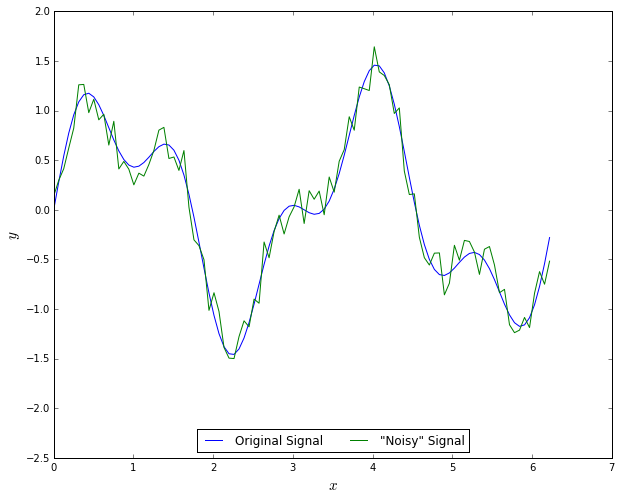

In [368]:
# Adjust the size of the current figure
pyplot.figure(figsize=(10, 8))
# Plot the original and noisy signals on the current axes 
plottedCurves = pyplot.plot(xValues, yValuesClean, xValues, yValuesDirty)

'''
Add a legend. Note the use of the loc and ncol keyword arguments to reposition 
and reshape the legend.
'''
pyplot.legend((plottedCurves[0], plottedCurves[1]), ('Original Signal', '"Noisy" Signal'), loc='lower center', ncol=2)

# Customize plot axes
pyplot.ylim(-2.5, 2)
'''
Note that since pyplot.xlabel(...) and pyplot.ylabel(...) return matplotlib.text.Text 
instances, the set_fontsize(...) method can be invoked directly.
'''
pyplot.xlabel(r"$x$").set_fontsize(15)
pyplot.ylabel(r"$y$").set_fontsize(15)

#### Step 4: Perform the forward FFT

Invoke the `scipy.fftpack.fft(...)` function to perform the one-dimensional FFT. The simplest invocation requires a single array-type argument containing the $y$-value samples to which the FFT should be applied.

The function returns a `numpy.array` with `numElements` complex-valued elements corresponding to the FFT result.

In [369]:
fftVals = scipy.fftpack.fft(yValuesDirty)

The output of the `help(...)` function for the `scipy.fftpack.fft` function details the the appropriate interpretation of the elements of the `array` that is returned.

In [370]:
help (scipy.fftpack.fft)

Help on function fft in module scipy.fftpack.basic:

fft(x, n=None, axis=-1, overwrite_x=False)
    Return discrete Fourier transform of real or complex sequence.
    
    The returned complex array contains ``y(0), y(1),..., y(n-1)`` where
    
    ``y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum()``.
    
    Parameters
    ----------
    x : array_like
        Array to Fourier transform.
    n : int, optional
        Length of the Fourier transform.  If ``n < x.shape[axis]``, `x` is
        truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
        default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the fft's are computed; the default is over the
        last axis (i.e., ``axis=-1``).
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    
    Returns
    -------
    z : complex ndarray
        with the elements::
    
            [y(0),y(1),..,y(n/2),y(1-n/2),...,y(-

In summary:

1. The zeroth element of `fftVals` contains the zero-frequency term.
2. Elements between 1 and $N/2$ contain the positive-frequency terms, in order of increasing frequency.
3. The remaining $N/2-1$ elements contain the negative-frequency terms, in order of decreasing frequency.

**Note** that the `scipy.fftpack.fftshift(...)` function rearranges the elements of the `numpy.array` that is returned by `scipy.fftpack.fft`, such that the elements are in strictly increasing order of frequency from the most negative to the most positive with the zero-frequency term at the midpoint.

**Note** that the `scipy.fftpack.fftfreq(...)` function enables computation the frequency **values** that correspond to each of the elements of the `numpy.array` that is returned by `scipy.fftpack.fft`. 

In [371]:
'''
Generate a numpy.array that simply enumerates the elements of the 
numpy.array that is returned by scipy.fftpack.fft.
'''
fftElements = numpy.arange(0,numSamples,1)

'''
Generate a numpy.array that defines the frequencies that correspond to
the elements of the numpy.array that is returned by scipy.fftpack.fft.
'''
sampleSpacing = (sampleRange[1] - sampleRange[0])/numSamples
fftFrequencies = scipy.fftpack.fftfreq(int(numSamples), sampleSpacing)

'''
Generate a numpy.array that defines the frequencies that correspond to
the elements of the numpy.array that is returned by scipy.fftpack.fft,
rearranged into strictly increasing order.
'''

shiftedFftFrequencies = scipy.fftpack.fftshift(fftFrequencies)

'''
Apply a similar shift to the FFT components comprising the numpy.array 
that is returned by scipy.fftpack.fft.
'''
shiftedFftVals = scipy.fftpack.fftshift(fftVals)

The **magnitude** of each complex-valued element encodes the contribution of sinusoidal components with the corresponding frequency to the sampled signal. The `numpy.abs(...)` function computes the magnitude of all elements in the FFT result array using a single operation.  

In [372]:
contributions = numpy.abs(fftVals)
shiftedContributions = numpy.abs(shiftedFftVals)

#### Step 5: Plot the Results

Plot the computed contributions of each frequency to the input signal as a bar chart, using the `pyplot.bar(...)` function. Generate two plots:

1. A plot illustrating the computed magnitude of **all** elements of `fftVals`, in the order they are returned.
2. A plot illustrating the first $N/2$ elements of `fftVals` corresponding to the zero and positive-frequency components.
3. A plot illustrating a _thresholded_ copy of the computed magnitude of **all** elements of `fftVals` with any values that are less than 10 set equal to zero. **Note** the use of a `numpy.array` of boolean values to provide an _indexing mask_ that selects array elements that fulfil a particular criterion.

Note that for purely real input data, the **magnitudes** of the corresponding positive and negative frequency components are identical.

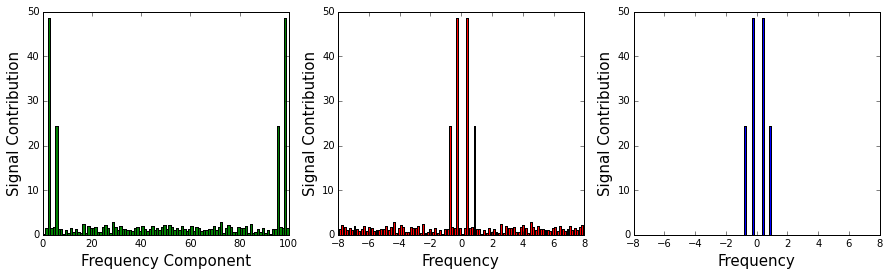

In [373]:
# Customize the size of the current figure.
pyplot.figure(figsize=(15, 4))

'''
Define a grid of two horizontally arranged axis pairs. 

Plot the computed magnitude of all elements of "fftVals".
'''
pyplot.subplot(1,3,1)
pyplot.bar(fftElements, contributions, color='g', width=1)
pyplot.xlabel("Frequency Component").set_fontsize(15)
pyplot.ylabel("Signal Contribution").set_fontsize(15)

'''
Plot the first N/2 elements of "fftVals" corresponding to the zero 
and positive-frequency components.
'''
pyplot.subplot(1,3,2)
pyplot.bar(shiftedFftFrequencies, shiftedContributions, color='r', width=2*sampleSpacing)
pyplot.xlabel("Frequency").set_fontsize(15)
pyplot.ylabel("Signal Contribution").set_fontsize(15)

'''
Plot a thresholded copy of the computed magnitude of all elements
of fftVals with any values that are less than 10 set equal to zero.
'''
pyplot.subplot(1,3,3)

'''
Generate a numpy.array containing a boolean-value that corresponds to each
element of the "contributions" array. The elements of this array should be 
equal to "True" if the the value of the corresponding element of "contributions"
is < 10 and "False" otherwise.
'''
lowContributionIndices = shiftedContributions < 10
# Make a deep copy of the shiftedContributions array
highContributions = shiftedContributions.copy()
'''
Use the "lowContributionIndices" as an indexing mask to set only those elements
of "highContributions" that correspond to True-valued elements of 
"lowContributionIndices" to zero.
'''
highContributions[lowContributionIndices] = 0
pyplot.bar(shiftedFftFrequencies, highContributions, color='b',  width=2*sampleSpacing)
pyplot.xlim(-8, 8)
pyplot.xlabel("Frequency").set_fontsize(15)
pyplot.ylabel("Signal Contribution").set_fontsize(15)

#### Step 6: Perform an Inverse FFT of a **Filtered** Contribution Spectrum

Use the `lowContributionIndices` array to generate a filtered copy of the complex-valued `fftVals` array that was returned by the `scipy.fftpack.fft(...)` function. 

In [374]:
'''
Make a deep copy of the numpy.array of complex-valued elements that
was returned by scipy.fftpack.fft(...)
'''
filteredFftVals = fftVals.copy()

'''
Generate an indexing mask that retains only the zero-frequency component
and the components with magnitudes greater than 10.
'''
filteredIndices = numpy.abs(filteredFftVals) < 10
filteredIndices[0] = False

'''
Set all unmasked elements of the deep copy array to zero.
'''
filteredFftVals[filteredIndices] = 0

Now invoke the `scipy.fftpack.ifft(...)` function to perform the inverse FFT.

In [375]:
# Perform an inverse FFT of the filtered complex-valued array
filteredYVals = scipy.fftpack.ifft(filteredFftVals)

#### Step 7: Plot the Result of the Inverse FFT

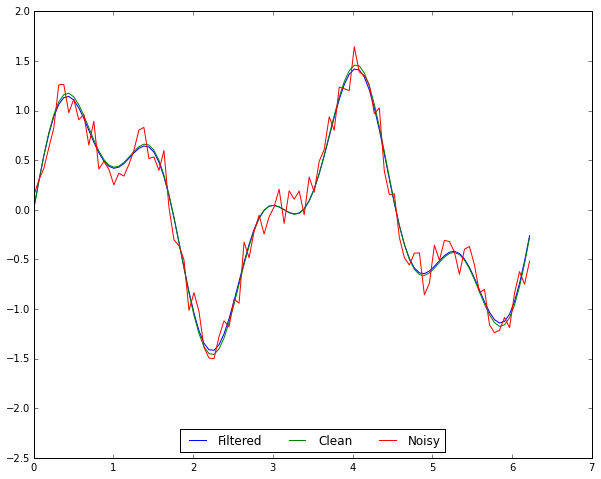

In [376]:
# Adjust the size of the current figure
pyplot.figure(figsize=(10, 8))

''' Plot three curves corresponding to:
1. The result of the FFT filtering process.
2. The noise-free function samples.
3. The noisy function samples.
'''
plottedCurves = pyplot.plot(xValues, numpy.real(filteredYVals), xValues, yValuesClean, xValues, yValuesDirty)
'''
Add a plot legend and adjust the y-limits of the current axes
to accommodate its extent.
'''
pyplot.legend((plottedCurves[0], plottedCurves[1], plottedCurves[2]), ("Filtered","Clean","Noisy"), loc='lower center', ncol=3)
newLimits = pyplot.ylim(-2.5, 2.0)

### Simulating Artificial Datasets, Fitting and Optimization

Many scientific analyses involve modeling experimental data using phenomenological or physically motivated analytical functions. The `scipy` package provides several subpackages that enable straightforward construction of parameterized analytical models. See the online tutorials on [basic](http://docs.scipy.org/doc/scipy/reference/tutorial/basic.html) and [special](http://docs.scipy.org/doc/scipy/reference/tutorial/special.html) parametric functions for more details.

If experimental data are not straightforwardly modeled using simple analytical functions, **Monte Carlo simulations** are often used in modern scientific analyses to provide artificial datasets that can be compared with measurement results. Such simulations often require the generation pseudo-randomly distributed datasets that conform to a particular expected **distribution function**.

The `scipy` package includes the `stats` subpackage, which in turn contains several "_Random Variable_" classes that encapsulate the properties of **over 90** of the most commonly ecountered distribution functions.

The "_Random Variable_" classes provide a number of methods that compute statistical properties of the distributions they describe such as the _Probablility Density Function_ (PDF) and the _Cumulative Density Function_ (CDF). They also provide methods to generate point **samples of values** that conform to the modeled distribution.  

The [`scipy.stats`](http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) package provides [extensive online documentation](http://docs.scipy.org/doc/scipy/reference/stats.html), and an [introductory tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) is also available. 

Assuming a particular data-modelling strategy, the [`scipy.optimize`](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) package defines several functions that can be used to _fit_ models to experimentally measured data.

#### Step 1: Import the `scipy.stats` subpackage

In [377]:
'''
Import the scipy.stats subpackage, which provides facilities to
simulate artificial datasets.
'''
from scipy import stats

#### Step 2: Generate an Artificial Dataset.
All of the "_Random Variable_" classes that are provided by `scipy.stats` package provide an `rvs(...)` method that returns a `numpy.array` containing a user-specified number of numeric elements with values that are randomly generated in accordance with the distribution function that the "_Random Variable_" class models.

The number of arguments that are **required** by each `rvs(...)` method is equal to the number of **parameters** that define the distribution function that the associated "_Random Variable_" class models. The `scipy` documentation refers to these required arguments as **shape parameters**.

The optional **keyword argument** `size` controls the number of data that are generated by the `rvs(...)` method. If `size` is not provided, a single randomly generated value is returned.

In [378]:
help(scipy.stats.poisson.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(self, *args, **kwargs) method of scipy.stats._discrete_distns.poisson_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    size : int or tuple of ints, optional
        Defining number of random variates (default=1).  Note that `size`
        has to be given as keyword, not as positional argument.
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.



The `scipy.stats.poisson` class models the [_Poisson_](http://en.wikipedia.org/wiki/Poisson_distribution) distribution function. 
$$P(x|\lambda)=\frac{{e^{ - \mu } \mu^x }}{{x!}}$$
The _Poisson_ distribution is a discrete probability distribution that expresses the probability of $x$ events occurring in a fixed interval of time and/or space if these events occur with a known average rate $\mu$ and independently of the time since the last event. 

In [379]:
help(scipy.stats.poisson)

Help on poisson_gen in module scipy.stats._discrete_distns object:

class poisson_gen(scipy.stats._distn_infrastructure.rv_discrete)
 |  A Poisson discrete random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability mass function for `poisson` is::
 |  
 |      poisson.pmf(k) = exp(-mu) * mu**k / k!
 |  
 |  for ``k >= 0``.
 |  
 |  `poisson` takes ``mu`` as shape parameter.
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      poisson_gen
 |      scipy.stats._distn_infrastructure.rv_discrete
 |      scipy.stats._distn_infrastructure.rv_generic
 |      __builtin__.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_discrete:
 |  
 |  __init__(self, a=0, b=inf, name=None, badvalue=None, moment_tol=1e-08, values=None, inc=1, longname=None, shapes=None, extradoc=None)
 |  
 |  cdf(self, k, *args, **kwds)
 |      Cumulative distribution function of the given RV.
 |      
 |      Parameters
 |      ----------
 |      k : array_lik

The _Poisson_ distribution is completely characterized by the **single shape parameter** `mu`. The following invocation of `scipy.stats.poisson.rvs(...)` generates a `numpy.array` containing 2000 randomly generated $x$-values. The generated values could be interpreted as independent **measurements** of the **number of events per interval** that are consistent with a _Poisson_ process for which the **expected rate $\mu=5$ events per interval**. 

In [380]:
'''
Generate 2000 random variates corresponding to measured event counts
per interval that are consistent with a Poisson process for which the 
expected rate "mu" is 5 events per interval.
'''
mu = 5
poissonValues = scipy.stats.poisson.rvs(mu, size=2000)

#### Step 3: Plot a Histogram of the Simulated Data
**Histograms** are typically used to visualize the distributions of unbinned datasets. The `matplotlib.pyplot` module provides the `hist(...)` function to generate and render histogram of unbinned datasets.

In [381]:
help(matplotlib.pyplot.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        arrays which ar

The `matplotlib.pyplot.hist(...)` function **requires** a single argument which should be a _Python_ sequence or `numpy.array` containing unbinned values to be histogrammed. The histogram generation and rendering can be customized using several **keyword arguments**.

The invocation of `matplotlib.pyplot.hist(...)` in the subsequent cell uses the `bins` keyword argument to generate a histogram with 15 bins instead of the default 10.

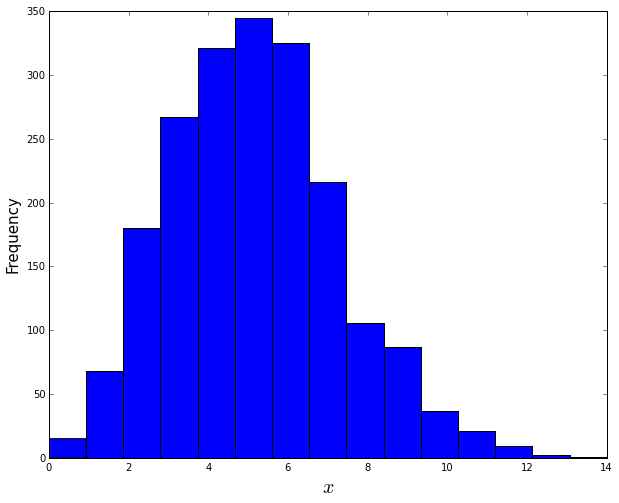

In [382]:
# Adjust the size of the current figure
pyplot.figure(figsize=(10, 8))

'''
Generate and plot a histogram of the Poisson-distributed values that were
generated in Step 2. The hist(...) function returns data describing the 
bins of the generated histogram and thier contents.
'''
binProperties = pyplot.hist(poissonValues, bins=15)

# Customize the labels of the current axes
pyplot.xlabel(r'$x$').set_fontsize(20)
pyplot.ylabel('Frequency').set_fontsize(15)

#### Step 4: Fit a Function to Unbinned Data
The `scipy.optimize` package provides the generic `minimize(...)` function, which determines the set of **parameter values $\mathbf{\Theta} = \{\theta_{1}, \theta_{2}, \ldots, \theta_{n}\}$** that **minimizes** the value of a specified **but arbitrary** function $f(\mathbf{x})$ (of the dataset $\mathbf{x}=\{x_{1}, x_{2}, \ldots, x_{m}\}$) that they parameterize.

By providing an **appropriate definition** for $f(\mathbf{x})$, the `scipy.optimize.minimize(...)` function can be uset to **fit** a parametric model function to an experimental dataset.

In [383]:
# Import the scipy.optimize subpackage
from scipy import optimize

help(scipy.optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead'
            - 'Powell'
            - 'CG'
            - 'BFGS'
            - 'Newton-CG'
            - 'Anneal (deprecated as of scipy version 0.14.0)'
            - 'L-BFGS-B'
            - 'TNC'
            - 'COBYLA'
            - 'SLSQP'
            - 'dogleg'
            - 'trust-ncg'
            - custom - a callable object (added in version 0.14.0)
    
  

The log-likelihood $\mathcal{L}(\mathbf{\Theta} | \mathbf{x})$ is commonly minimized when fitting a probabilistic model to data. This function computes the logarithm of the probability that a model described by a particular set of  parameters would result in the observed dataset. 

Consider the concrete example of the _Poisson_ distribution, for which $\mathbf{\Theta}\rightarrow\mu$.

$$\mathcal{L}\left(\mu|\mathbf{x}\right) = \displaystyle\sum_{i=1}^{m}\ln P\left(x_{i}|\mu\right) = \displaystyle\sum_{i=1}^{m}\ln\left(\frac{{e^{ - \mu } \mu^{x_{i}} }}{{x_{i}!}}\right)$$

Since $P\left(x_{i}|\mu\right)$ is a probability and is necessarily positive, $-\mathcal{L}\left(\mu|\mathbf{x}\right)$ should be provided as the `fun` argument to `scipy.optimize.minimize(...)`.

In [413]:
def poissonLikelihood(mu, data) :
    '''
    A function that computes the negative log-likelihood that 
    a Poisson process with expected rate "mu" resulted in generation
    of the observed dataset "data".
    
    ARGUMENTS:
    ==========
    mu - The mu argument should be a float-type specifying the expected
    rate of the modeled Poisson process.
    data - The data argument should be a numpy.array containing experimental
    data
    
    '''    
    '''
    Invoke the scipy.stats.poisson.pmf(...) method to compute the 
    probability of that element of "data" would be produced by a Poisson
    process with expected rate "mu".
    
    Note that the scipy.stats.poisson.pmf(...) method operates on the entire
    data array and returns a numpy.array of the corresponding probabilities.
    '''
    dataLikelihoods = scipy.stats.poisson.pmf(data, mu)
    
    '''
    Attempt to avoid problems associated with computing the logarithm of zero by 
    returning a very large positive result if any elements of "dataLikelihoods"
    are zero. The numpy.count_nonzero(...) function is used.
    '''
    if numpy.count_nonzero(dataLikelihoods) < len(dataLikelihoods) :
        return 1e20
    
    '''
    Use the numpy.log(...) and numpy.sum(...) functions to compute the return
    value.
    '''
    return -numpy.sum(numpy.log(dataLikelihoods))

'''
Sanity-test the "poissonLikelihood(...)" function for several test values of "mu"
to verify that the minimum value corresponds to  
'''
print "Assuming mu - 1 => ", poissonLikelihood(mu - 1, poissonValues)
print "Assuming mu => ", poissonLikelihood(mu, poissonValues)
print "Assuming mu + 1 => ", poissonLikelihood(mu + 1, poissonValues)

Assuming mu - 1 =>  4695.28964717
Assuming mu =>  4446.00264992
Assuming mu + 1 =>  4608.20135744


The subsequent cell contains an invocation of the `scipy.optimize.minimize(...)` function that will determine the value of $\hat\mu$ that is most likely to have resulted in the `poissonValues` dataset (**Recall** that `poissonValues` was generated using a true value of $\mu=5$). The following values are supplied as function arguments:

1. `fun`: The **identifier** of the `poissonLikelihood` function **without parentheses**. This is the generic mechanism by which function-types can be passed as function or method arguments in _Python_.
2. `x0`: An _initial guess_ for the value of $\hat\mu$. A value of 1 is used to demonstrate that the `minimize` function does indeed converge towards $\mu=5$.
3. Keyword argument `args`: The generated `poissonValues` dataset is provided as a **single element** `tuple` using optional keyword argument `args`. In general, the elements of the `tuple` that is provided as the value of `args` will be unpacked and provided as separate arguments to the objective function that is supplied as the `fun` argument. 

The `scipy.optimize.minimize(...)` function returns an instance of the `scipy.optimize.OptimizeResult` class which defines a `numpy.array`-type member datum `x` that generally contains the values of the parameters ($\mathbf{\Theta}$) that minimize the value returned by the objective function supplied as the `fun` argument to `scipy.optimize.minimize(...)`. 

In this case, `x` contains a single element corresponding to the value of $\hat\mu$ that is most likely to have resulted in the generation of `poissonValues`.

In [419]:
# Use a value of 1 as an initial guess for the expected rate
muGuess = 1

'''
Invoke the scipy.optimize.minimize(...) function to determine the 
value of mu that is most likely to have resulted in the "poissonValues" dataset. 
'''
result = scipy.optimize.minimize(poissonLikelihood, muGuess, args=(poissonValues,))
    
'''
Print the value of mu that minimizes the value returned by "poissonLikelihood(...)"
Ideally this should be close to the value of mu=5 which was used to generate
the "poissonValues" dataset.
'''
print "Most likely Poisson rate is", result.x[0], "which differs from true rate by", result.x[0] - mu

Most likely Poisson rate is 5.0400001566 which differs from true rate by 0.0400001565955


#### Step 5: Fit a Function to Binned Data
The `scipy.optimize` package provides the `curve_fit(...)` function to enable straightforward fitting of specified **but arbitrary** functions to **binned** datasets using [nonlinear least-squares](http://en.wikipedia.org/wiki/Non-linear_least_squares) minimization.

In [427]:
help(scipy.optimize.curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, **kw)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be determined using introspection, otherwise a ValueEr

A _Binned Dataset_ can be nominally defined as **two** numeric sequences. The first sequence defines a series of coordinate values (nominally bin centres), while the second sequence defines arbitrary measured values (nominally bin contents) that correspond to the coordinate values defined by the elements of the first sequence.

The subsequent cells demonstrate the generation of an artificial **binned** dataset by adding random Gaussian offsets to 50 equally spaced samples of an analytic one-dimensional function.
$$f(x|\Theta) = \theta_{1}\sin(\theta_{2}x)+\theta_{3}\cos(\theta_{4}x)$$
where 
$$\Theta = \{\theta_{1},\theta_{2},\theta_{3},\theta_{4}\}$$
are the "_true_" function parameters.

The `rvs(...)` method that is provided by the [`scipy.stats.norm`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) class is used to generate the required random Gaussian offsets.

In [425]:
# Generate a "binned dataset" using 50 function samples
numSamples = 50
'''
Define a numpy.array that specifies a set of "true" parameter values
to be used when generating an arificial "binned dataset".

Use a constructor that accepts a Python list type
and initializes its elements to match those of the provided list.
'''
trueParameters = numpy.array([0.3, 2, 0.8, 0.5])

'''
Use the numpy.linspace(...) function to generate a numpy.array containing
50 equally spaced x-values between -5 and 5.
'''
xValues = numpy.linspace(-5, 5, numSamples)

'''
Generate an array of 50 "clean" values of f(x) evaluated for each of the 
elements of xValues, using the true function parameters.

The numpy.sin(...) and numpy.cos(...) functions are used to operate on 
entire arrays at once.
'''
yValuesClean = trueParameters[0]*numpy.sin(trueParameters[1]*xValues)
yValuesClean += trueParameters[2]*numpy.cos(trueParameters[3]*xValues)

'''
Use the rvs(...) method that is provided by the `scipy.stats.norm` class
to generate a numpy.array of 50 randomly generated Gaussian distributed
random offsets assuming a Gaussian mean of zero and a variance of 0.15
'''
yOffsets = scipy.stats.norm.rvs(0, 0.15, size=numSamples)

'''
Add the random offsets to the corresponding elements of the "clean" 
function samples.
'''
yValuesDirty = yValuesClean + yOffsets

The first argument (`f`) that is required by `scipy.optimize.curve_fit(...)` method **must** be the identifier of a  function that accepts an $x$-coordinate value as its first argument and the **individual elements** of the parameter vector $\mathbf{\Theta}$ as its remaining arguments.

The subsequent cell defines an appropriate function called `modelFunction` that can be fitted to the artificial (`xValues`, `yValuesDirty`) binned dataset. 

In [ ]:
'''
Define a function to be supplied to scipy.optimize.curve_fit(...) as the 
objective function argument "f".
'''
def modelFunction(x, p1, p2, p3, p4) :
    '''
    Function evaluates f(x) = p1*sin(p2*x) + p3*cos(p4*x) using the supplied
    arguments. 
    
    Use of numpy.sin(...) and numpy.cos(...) functions allows x and the 
    remaining arguments to be numpy array types so modelFunction is 
    implicitly a vector function.
    '''
    return p1*numpy.sin(p2*x) + p3*numpy.cos(p4*x)

The subsequent cell contains an invocation of the `scipy.optimize.curve_fit(...)` function that will determine the values of the elements of $\hat{\mathbf{\Theta}}$ that define the function $f(x|\hat{\mathbf{\Theta}})$ that most closely approaches the values of `yValuesDirty` at each of the corresponding $x$-coordinates that are specified by `xValues`. The following values are supplied as function arguments:

1. `f`: The **identifier** of the `modelFunction` function **without parentheses**.
2. `xdata`: A `numpy.array` specifying the $x$-coordinates for which measured values are provided.
3. `ydata`: A `numpy.array` specifying the measured values to be fitted using `f`.
4. Keyword argument `p0`: An _initial guess_ for the value of $\hat{\mathbf{\Theta}}$ supplied as a _Python_ `tuple` type. A value of `(0.5,1.5,1.0,0.7)` is used to demonstrate that the `curve_fit` function does indeed vary the elements of $\hat{\mathbf{\Theta}}$ such that they converge the towards the "_true_" values of the elements of $\mathbf{\Theta}$.

The `scipy.optimize.curve_fit(...)` function returns a sequence containing two elements. The first element of the returned sequence is a one-dimensional `numpy.array` containing the best-fitting values of the $\hat{\mathbf{\Theta}}$ that were determined by `scipy.optimize.curve_fit(...)`. The second element is a two-dimensional `numpy.array` containing the **covariance matrix** that can be used to determine any correlation between the model parameters as well as the uncertainty that is associated with an optimized parameter value.

In [435]:
'''
Define a Python tuple containing four initial guesses for the
values of the parameters of 
'''
guessedPars = (0.5,1.5,1.0,0.7)

'''
Invoke the scipy.optimize.curve_fit(...) function to determine the set of 
model parameters that best replicate the observed data.
'''
optimalPars, covMat = scipy.optimize.curve_fit(modelFunction, xValues, yValuesDirty, p0=guessedPars)

print "Optimized parameter values:\n",optimalPars 
print "\nDifference from true parameter values:\n",optimalPars - trueParameters
print "\nDifference from guessed parameter values:\n",optimalPars - guessedPars

Optimized parameter values:
[ 0.30552654  1.97770158  0.77906687  0.48748238]

Difference from true parameter values:
[ 0.00552654 -0.02229842 -0.02093313 -0.01251762]

Difference from guessed parameter values:
[-0.19447346  0.47770158 -0.22093313 -0.21251762]


#### Step 6: Plot the Results of the Fit to a Binned Dataset

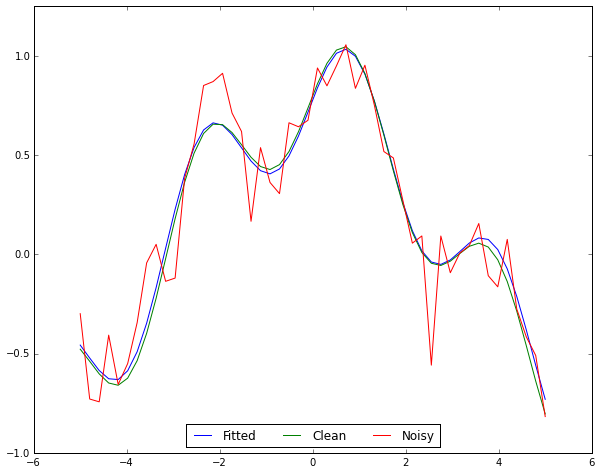

In [431]:
# Adjust the size of the current figure
pyplot.figure(figsize=(10, 8))

''' Plot three curves corresponding to:
1. The fitted function samples.
2. The noise-free function samples.
3. The noisy function samples.
'''
yValuesFitted = modelFunction(xValues, optimalPars[0], optimalPars[1], optimalPars[2], optimalPars[3])
plottedCurves = pyplot.plot(xValues, yValuesFitted, xValues, yValuesClean, xValues, yValuesDirty)

'''
Add a plot legend and adjust the y-limits of the current axes
to accommodate its extent.
'''
pyplot.legend((plottedCurves[0], plottedCurves[1], plottedCurves[2]), ("Fitted","Clean","Noisy"), loc='lower center', ncol=3)
newLimits = pyplot.ylim(-1, 1.25)

## Handling Special File Formats

Often retrictions imposed by laboratory facilities, a legacy of previous experience, or the requirements of an experimental technique mandate the use of a software package that uses a proprietory file format. 

Occasionally it is not convenient to analyse the experimental data using the tool that was used to obtain them. Fortunately, the `scipy` package includes the `io` subpackage, which provides functions that enable data to be extracted from and (in many cases) written to files with formats that are commonly encountered in the course of scientific research. 

### MATLAB Files

The `scipy.io` subpackage provides support for **reading** and **writing** files that are compatible with the [_MATLAB_](http://www.mathworks.com/products/matlab/) data analysis utility. 

#### Step 1: Importing the `scipy.io` Subpackage

In [389]:
from scipy import io

#### Step 2: Writing to a File Using the _MATLAB_ File Format

Data can be written to [_MATLAB_ compatible files](http://www.mathworks.com/help/pdf_doc/matlab/matfile_format.pdf) using the `scipy.io.savemat(...)` function.

In [390]:
help(scipy.io.savemat)

Help on function savemat in module scipy.io.matlab.mio:

savemat(file_name, mdict, appendmat=True, format='5', long_field_names=False, do_compression=False, oned_as='row')
    Save a dictionary of names and arrays into a MATLAB-style .mat file.
    
    This saves the array objects in the given dictionary to a MATLAB-
    style .mat file.
    
    Parameters
    ----------
    file_name : str or file-like object
        Name of the .mat file (.mat extension not needed if ``appendmat ==
        True``).
        Can also pass open file_like object.
    mdict : dict
        Dictionary from which to save matfile variables.
    appendmat : bool, optional
        True (the default) to append the .mat extension to the end of the
        given filename, if not already present.
    format : {'5', '4'}, string, optional
        '5' (the default) for MATLAB 5 and up (to 7.2),
        '4' for MATLAB 4 .mat files
    long_field_names : bool, optional
        False (the default) - maximum field name

_Python_ `dict` types are used to aggregate the data that are to be saved in a _MATLAB_-compatible format. The `dict` keys **must** be _Python_ `str`-type variables or literals, but numerous __Python__ and `numpy` types are permitted for the associated `dict` values.

The subsequent material in this section demonstrates that

* If the value associated with a particular `dict` key is a `numpy.array`, then that value will be saved as a **_MATLAB_ Array Data** type.
* If the value associated with a particular `dict` key is **itself** a `dict` with `str`-type keys, then that value will be saved as a **_MATLAB_ struct** type.

For details about other types that can be written using the `scipy.io.savemat(...)` function, consult the [online documentation](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/io.html#matlab-files).

In [391]:
'''
Aggregate the arrays containing samples of the clean, noisy, and 
fitted functions into a dict with str-type keys. This results in 
a MATLAB struct-type being saved.
'''
yValuesAll = {"yValuesClean" : yValuesClean, "yValuesDirty" : yValuesDirty, "yValuesFitted" : yValuesFitted }
'''
Invoke the scipy.io.savemat(...) function to write the specified
data to a file called "testMatlabFile.mat" (the suffix is appended
automatically). Providing the sequence of sampled x-values as a
numpy.array with cause the to be stored as a MATLAB Array-Data-type
file entry.
'''
scipy.io.savemat('testMatlabFile', {"xValues" : xValues, "yValues" : yValuesAll})

#### Step 3: Examining the contents of a _MATLAB_-compatible File
In principle, _MATLAB_ compatible files may contain large quantities of compressed data. Reading these data into computer memory may not be desirable (or even fruitful if the format is particularly obscure). Instead, it may be sufficient to examine **reduced metadata** that describes the types and properties of the data a file contains.

The `scipy.io.whosmat(...)` function provides this functionality. Invoking the function returns a list of 3-element tuples. Each tuple corresponds to a particular data entry in the file and reports the _entry key_, the _dimensionality and extent_ of the corresponding data, and its _associated MATLAB type_. 

In [392]:
'''
Inspect the metadata that describe the contents of a 
MATLAB-compatible file.
'''
matlabFileMetadata = scipy.io.whosmat('testMatlabFile')
print matlabFileMetadata

[('yValues', (1, 1), 'struct'), ('xValues', (1, 50), 'double')]


#### Step 4: Extracting Data from _MATLAB_-compatible Files
The `scipy.io.loadmat(...)` function is provided to open a _MATLAB_-compatible file and load its contents into computer memory.

The function has a single **required** argument which **must** be a `str`-type value encoding the path of the file to be opened.

Several optional keyword arguments are also available to control how the extracted data are preprocessed and formattted before they are returned by `scipy.io.loadmat(...)`.

In [393]:
help(scipy.io.loadmat)

Help on function loadmat in module scipy.io.matlab.mio:

loadmat(file_name, mdict=None, appendmat=True, **kwargs)
    Load MATLAB file
    
    Parameters
    ----------
    file_name : str
       Name of the mat file (do not need .mat extension if
       appendmat==True) Can also pass open file-like object.
    m_dict : dict, optional
        Dictionary in which to insert matfile variables.
    appendmat : bool, optional
       True to append the .mat extension to the end of the given
       filename, if not already present.
    byte_order : str or None, optional
       None by default, implying byte order guessed from mat
       file. Otherwise can be one of ('native', '=', 'little', '<',
       'BIG', '>').
    mat_dtype : bool, optional
       If True, return arrays in same dtype as would be loaded into
       MATLAB (instead of the dtype with which they are saved).
    squeeze_me : bool, optional
       Whether to squeeze unit matrix dimensions or not.
    chars_as_strings : bool,

In [394]:
# Open a MATLAB-compatible file and extract the data it contains.
matlabFileContents = scipy.io.loadmat('testMatlabFile')

#### Step 5: Parsing and Analysing the Extracted Data

In general, opening a MATLAB file using the `scipy.io.loadmat(...)` function returns a _Python_ `dict`-type with `str`-type keys and arbitrarily typed values. Consider the concrete example of the `dict` returned when `scipy.io.loadmat(...)` is invoked to load data from the "`testMatlabFile.mat`" file.

In [395]:
print "matlabFileContents:\n", matlabFileContents

matlabFileContents:
{'xValues': array([[-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
        -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
        -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
         0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
         1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
         2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
         3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
         4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ]]), '__version__': '1.0', 'yValues': array([[ ([[-0.3641322296880581, -0.7944781542255639, -0.714166405112781, -0.5731168334312824, -0.5185166570856664, -0.3385280348491456, -0.4139538718457293, -0.5451995583442366, -0.1833428294838396, 0.

**The first element** of the "`matlabFileContents`" `dict` that is returned has the `str`-type key "`xValues`", which maps to a **two-dimensional** `numpy.array`. The **innermost** (zeroth) dimension contains 50 `float`-type values corresponding to the 50 $x$ values at which the $y$ values were sampled. 

In [396]:
print "Dimensionality of xValues:\n", numpy.shape(matlabFileContents['xValues'])

print "\nSize of xValues[0]:\n", len(matlabFileContents['xValues'][0])

print "\nContent of xValues[0]:\n", matlabFileContents['xValues'][0]

Dimensionality of xValues:
(1, 50)

Size of xValues[0]:
50

Content of xValues[0]:
[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]


The **third element** has the `str`-type key "`yValues`", which maps to a **deeply nested structure** of `numpy.array`s that can be appropriately indexed to extract 50-element `numpy.arrays` containing samples of the _Clean_, _Dirty_ and _Fitted_ arrays.

The subsequent cells examine the properties of the data structure at increasing levels of nesting.

In [397]:
print "Dimensionality of yValues:\n", numpy.shape(matlabFileContents['yValues'])

Dimensionality of yValues:
(1, 1)


In [398]:
print "Type of yValues[0]:\n",type(matlabFileContents['yValues'][0])

Type of yValues[0]:
<type 'numpy.ndarray'>


In [399]:
print "Dimensionality of yValues[0]:\n", numpy.shape(matlabFileContents['yValues'][0])

Dimensionality of yValues[0]:
(1,)


In [400]:
print "Content of yValues[0]:\n", matlabFileContents['yValues'][0]

Content of yValues[0]:
[ ([[-0.3641322296880581, -0.7944781542255639, -0.714166405112781, -0.5731168334312824, -0.5185166570856664, -0.3385280348491456, -0.4139538718457293, -0.5451995583442366, -0.1833428294838396, 0.024281553173102252, 0.0316626923774887, 0.4901417957945993, 0.535155364944824, 0.8034328728935907, 0.6793290738023406, 0.8160300935910667, 0.6506873763887849, 0.62947161240384, 0.6548155374483016, 0.5995726250542033, 0.4366626882005817, 0.495462296742295, 0.38636018918436466, 0.5801886473069153, 0.8052748657834952, 0.6700504353677917, 1.2515207458134228, 0.7948037733242626, 0.84485544759467, 1.0178818602790773, 1.0819521489962984, 0.720140158522599, 0.7294761038005295, 0.4886728273921956, 0.46982833195250306, 0.21993315143267173, 0.2240696800250197, 0.17274498308617492, -0.08544209023204584, 0.06576704971465455, 0.2043318386160595, -0.05114119850932099, 0.12313897977600274, -0.050091994227557585, -0.017461896802026734, 0.10003928115763366, -0.19246101978086522, -0.3994693

In [401]:
print "Type of yValues[0][0]:\n", type(matlabFileContents['yValues'][0][0])

Type of yValues[0][0]:
<type 'numpy.void'>


**Note:** The `numpy.void` type is designed to be a **flexible type**. In this case it behaves as a sequence with 3 elements. Consult this [online documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) about `numpy` data types for more information.

In [402]:
print "Size of yValues[0][0]:\n", len(matlabFileContents['yValues'][0][0])

Size of yValues[0][0]:
3


In [403]:
print "\nContent of yValues[0][0]:\n", matlabFileContents['yValues'][0][0]


Content of yValues[0][0]:
([[-0.3641322296880581, -0.7944781542255639, -0.714166405112781, -0.5731168334312824, -0.5185166570856664, -0.3385280348491456, -0.4139538718457293, -0.5451995583442366, -0.1833428294838396, 0.024281553173102252, 0.0316626923774887, 0.4901417957945993, 0.535155364944824, 0.8034328728935907, 0.6793290738023406, 0.8160300935910667, 0.6506873763887849, 0.62947161240384, 0.6548155374483016, 0.5995726250542033, 0.4366626882005817, 0.495462296742295, 0.38636018918436466, 0.5801886473069153, 0.8052748657834952, 0.6700504353677917, 1.2515207458134228, 0.7948037733242626, 0.84485544759467, 1.0178818602790773, 1.0819521489962984, 0.720140158522599, 0.7294761038005295, 0.4886728273921956, 0.46982833195250306, 0.21993315143267173, 0.2240696800250197, 0.17274498308617492, -0.08544209023204584, 0.06576704971465455, 0.2043318386160595, -0.05114119850932099, 0.12313897977600274, -0.050091994227557585, -0.017461896802026734, 0.10003928115763366, -0.19246101978086522, -0.39946

In [404]:
print "\nType of yValues[0][0][0]:\n", type(matlabFileContents['yValues'][0][0][0])


Type of yValues[0][0][0]:
<type 'numpy.ndarray'>


In [405]:
print "\nSize of yValues[0][0][0]:\n", len(matlabFileContents['yValues'][0][0][0])


Size of yValues[0][0][0]:
1


In [406]:
print "\nContent of yValues[0][0][0]:\n", matlabFileContents['yValues'][0][0][0]


Content of yValues[0][0][0]:
[[-0.36413223 -0.79447815 -0.71416641 -0.57311683 -0.51851666 -0.33852803
  -0.41395387 -0.54519956 -0.18334283  0.02428155  0.03166269  0.4901418
   0.53515536  0.80343287  0.67932907  0.81603009  0.65068738  0.62947161
   0.65481554  0.59957263  0.43666269  0.4954623   0.38636019  0.58018865
   0.80527487  0.67005044  1.25152075  0.79480377  0.84485545  1.01788186
   1.08195215  0.72014016  0.7294761   0.48867283  0.46982833  0.21993315
   0.22406968  0.17274498 -0.08544209  0.06576705  0.20433184 -0.0511412
   0.12313898 -0.05009199 -0.0174619   0.10003928 -0.19246102 -0.3994694
  -0.59476917 -0.39287402]]


In [407]:
print "\nType of yValues[0][0][0][0]:\n", type(matlabFileContents['yValues'][0][0][0][0])


Type of yValues[0][0][0][0]:
<type 'numpy.ndarray'>


In [408]:
print "\nSize of yValues[0][0][0][0]:\n", len(matlabFileContents['yValues'][0][0][0][0])


Size of yValues[0][0][0][0]:
50


In [409]:
print "\nContent of yValues[0][0][0][0]:\n", matlabFileContents['yValues'][0][0][0][0]


Content of yValues[0][0][0][0]:
[-0.36413223 -0.79447815 -0.71416641 -0.57311683 -0.51851666 -0.33852803
 -0.41395387 -0.54519956 -0.18334283  0.02428155  0.03166269  0.4901418
  0.53515536  0.80343287  0.67932907  0.81603009  0.65068738  0.62947161
  0.65481554  0.59957263  0.43666269  0.4954623   0.38636019  0.58018865
  0.80527487  0.67005044  1.25152075  0.79480377  0.84485545  1.01788186
  1.08195215  0.72014016  0.7294761   0.48867283  0.46982833  0.21993315
  0.22406968  0.17274498 -0.08544209  0.06576705  0.20433184 -0.0511412
  0.12313898 -0.05009199 -0.0174619   0.10003928 -0.19246102 -0.3994694
 -0.59476917 -0.39287402]


#### Step 6: Plotting the extracted data

Now that the locations of the various data have been established it can be plotted in order to ensure that it was faithfully stored and recovered. 

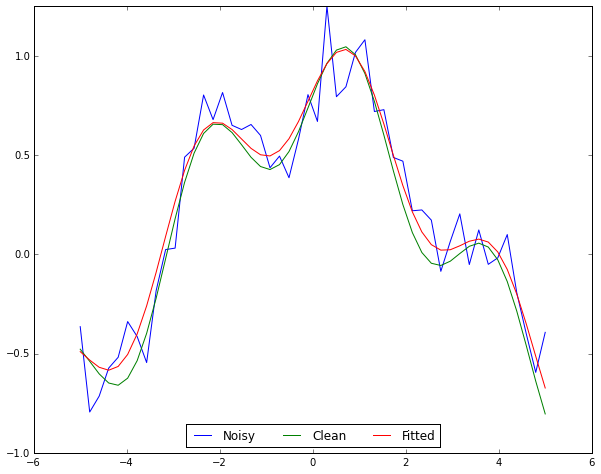

In [437]:
# Adjust the size of the current figure
pyplot.figure(figsize=(10, 8))

'''
The data are stored in nested sequences. Accordingly, a loop can be used to
the plot multiple series using multiple invocations of pyplot.plot(...).

Begin by defining an empty list to hold the matplotlib.lines.Line2D instances
that are returned by pyplot.plot(...).
'''
plottedCurves = []

'''
Recall that the individual y-value series are stored in doubly nested 
numpy.arrays populating the 3 elements of a flexible numpy.void type 
that was loaded into memory at:

matlabFileContents['yValues'][0][0].

Use a for-loop to iterate over the elements of the numpy.void type.
The loop variable 'yData' is a single element numpy array.
'''
for yData in matlabFileContents['yValues'][0][0] :
    '''
    All the stored y-value series correspond to a single x-value series
    that was loaded into memory at matlabFileContents['xValues'][0].
    
    The y-value series data are numpy.arrays occupying the zeroth element
    of the 'yData' variable
    
    Invoke the pyplot.plot(...) function to render a the current y-value
    series versus the correspondin x coordinates.
    '''
    plottedCurve = pyplot.plot(matlabFileContents['xValues'][0], yData[0])
    
    '''
    Append the matplotlib.lines.Line2D instance that was returned by the
    invocation of pyplot.plot(...) to the list of all plotted curves.
    '''
    plottedCurves.append(plottedCurve[0])
    
# Generate a legend to annotate each of the plotted curves
pyplot.legend((plottedCurves[0], plottedCurves[1], plottedCurves[2]), ("Noisy","Clean","Fitted"), loc='lower center', ncol=3)

# Adjust the limits of the current y-axis to accommodate the plot legend
newLimits = pyplot.ylim(-1, 1.25)

### IDL Files

The `scipy` package also provides the `scipy.io.readsav(...)` function that enables files that are produced using the _Interactive Data Language_ (IDL). Unfortunately, **writing** of IDL-format files is **not supported**.

As usual, more information about the `scipy.io.readsav(...)` function is available [online](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.io.readsav.html#scipy.io.readsav) or inline.

In [411]:
help (scipy.io.readsav)

Help on function readsav in module scipy.io.idl:

readsav(file_name, idict=None, python_dict=False, uncompressed_file_name=None, verbose=False)
    Read an IDL .sav file
    
    Parameters
    ----------
    file_name : str
        Name of the IDL save file.
    idict : dict, optional
        Dictionary in which to insert .sav file variables
    python_dict : bool, optional
        By default, the object return is not a Python dictionary, but a
        case-insensitive dictionary with item, attribute, and call access
        to variables. To get a standard Python dictionary, set this option
        to True.
    uncompressed_file_name : str, optional
        This option only has an effect for .sav files written with the
        /compress option. If a file name is specified, compressed .sav
        files are uncompressed to this file. Otherwise, readsav will use
        the `tempfile` module to determine a temporary filename
        automatically, and will remove the temporary file upon